In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from  scipy.stats import norm,skew
import time

In [5]:
train=pd.read_csv("data/train.csv", parse_dates=["datetime"])
test=pd.read_csv("data/test.csv", parse_dates=["datetime"])
train["cnt"]=train["count"]
train.drop(["count"],axis=1,inplace=True)

In [6]:
n_train=train.shape[0]
n_test=test.shape[0]
y_train=train.cnt.values
test_id=test.datetime
print (n_train,n_test)

10886 6493


In [7]:
train.head()
print(train.shape)

(10886, 12)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  cnt         10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
test["casual"]=np.nan
test["registered"]=np.nan
test["cnt"]=np.nan

In [10]:
all_data=pd.concat([train,test],axis=0)

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  cnt         10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.7 MB


In [12]:
def bar_plot(x,y,data,hue=None):
    f,ax=plt.subplots(figsize=(20,10))
    plt.xticks(rotation=70)
    sns.barplot(x=x,y=y,data=data,hue=hue)
    plt.show()
def count_plot(x):
    f,ax=plt.subplots()
    sns.countplot(x)
    plt.show()
def dist_plot(x):
    f,ax=plt.subplots()
    sns.distplot(x,fit=norm)
    plt.show()
def scatter_plot(x,y):
    f,ax=plt.subplots()
    sns.scatterplot(x=x,y=y)
    plt.show()

skip col : datetime
draw col: season


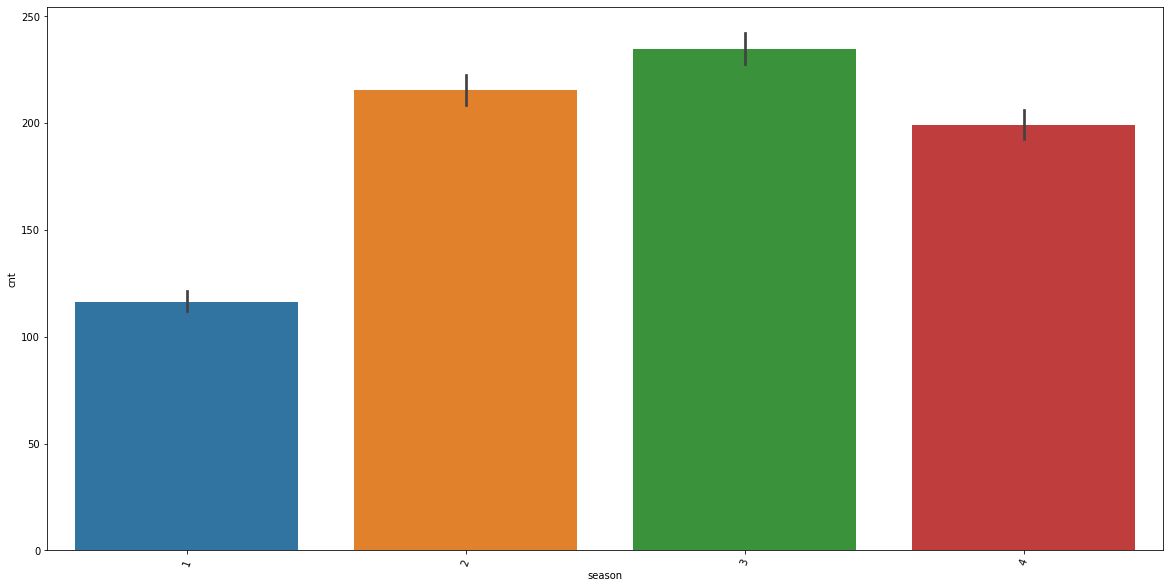

draw col: holiday


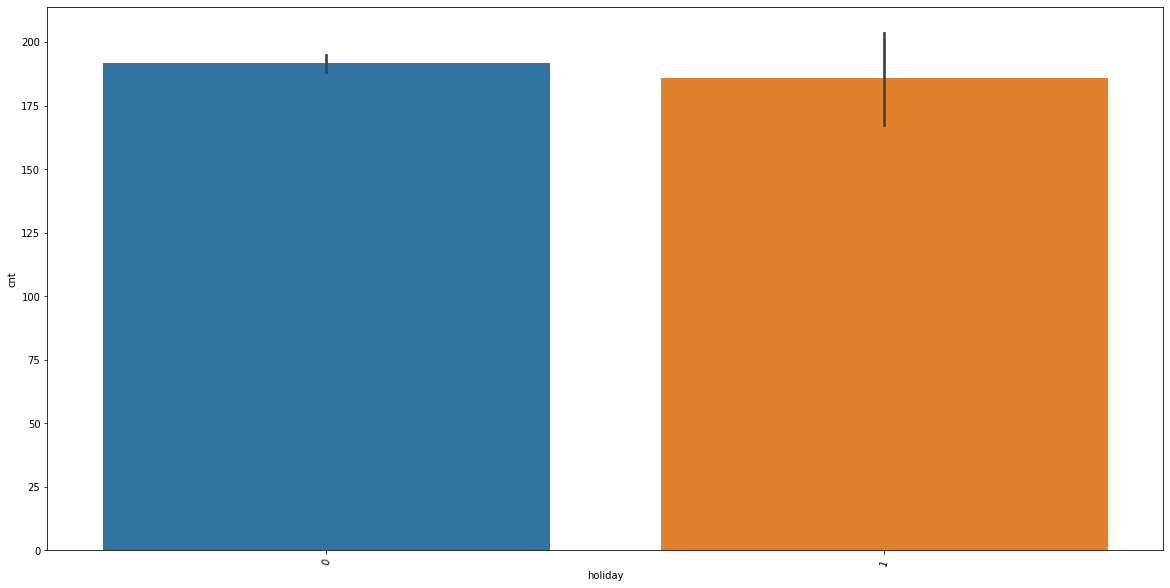

draw col: workingday


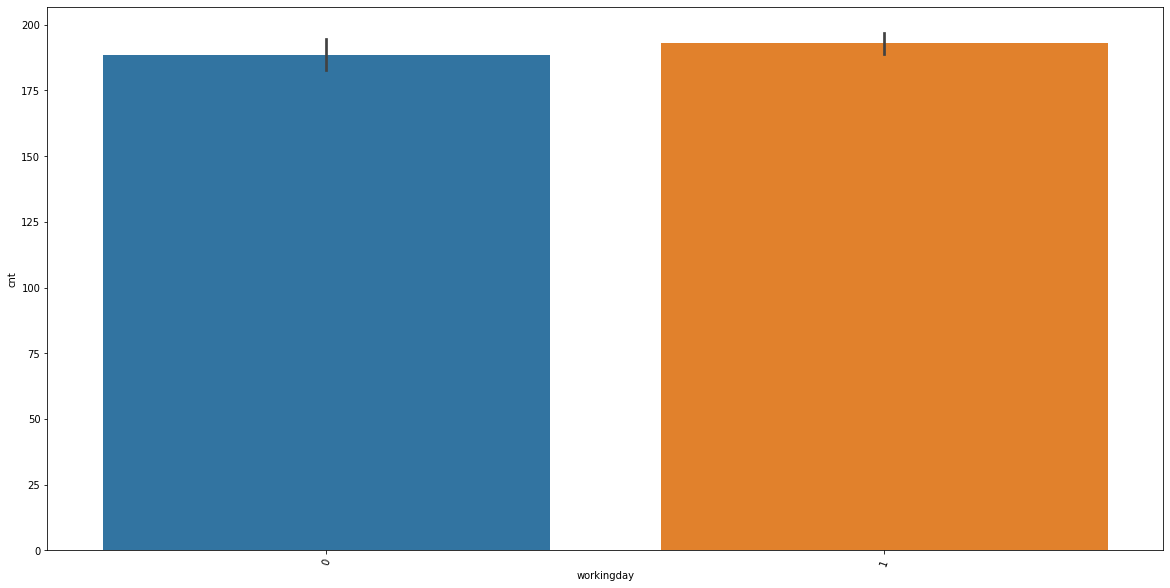

draw col: weather


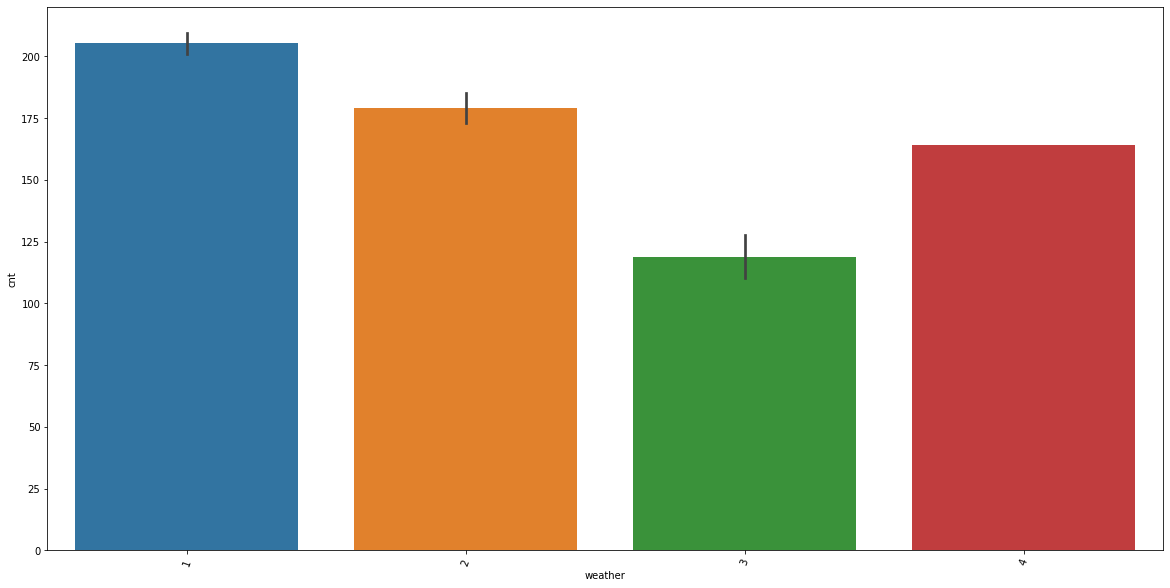

draw col: temp


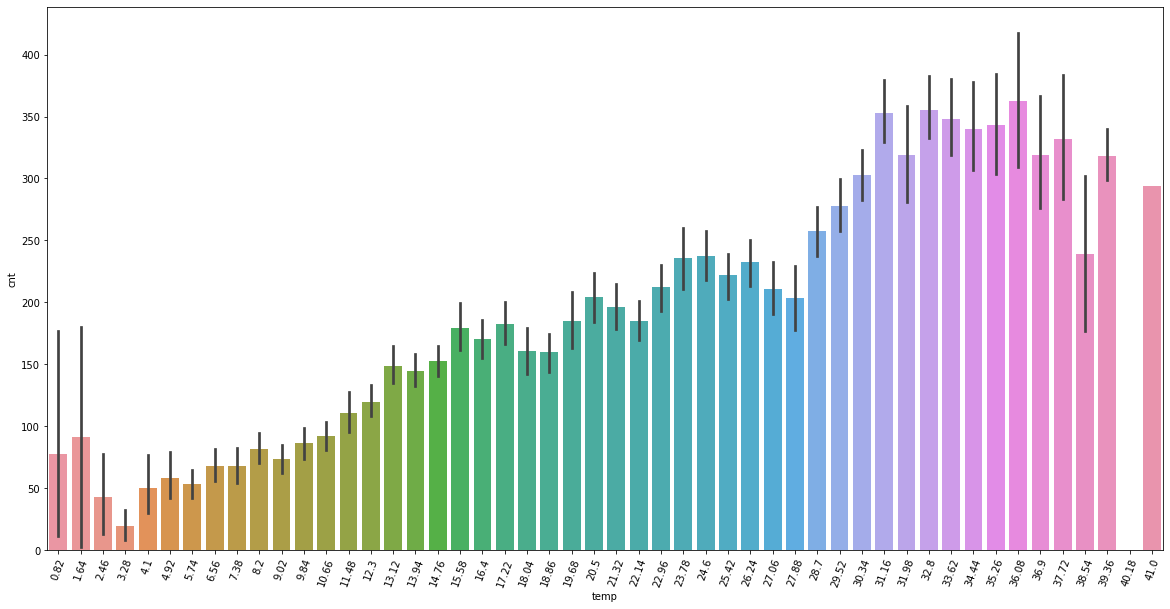

draw col: atemp


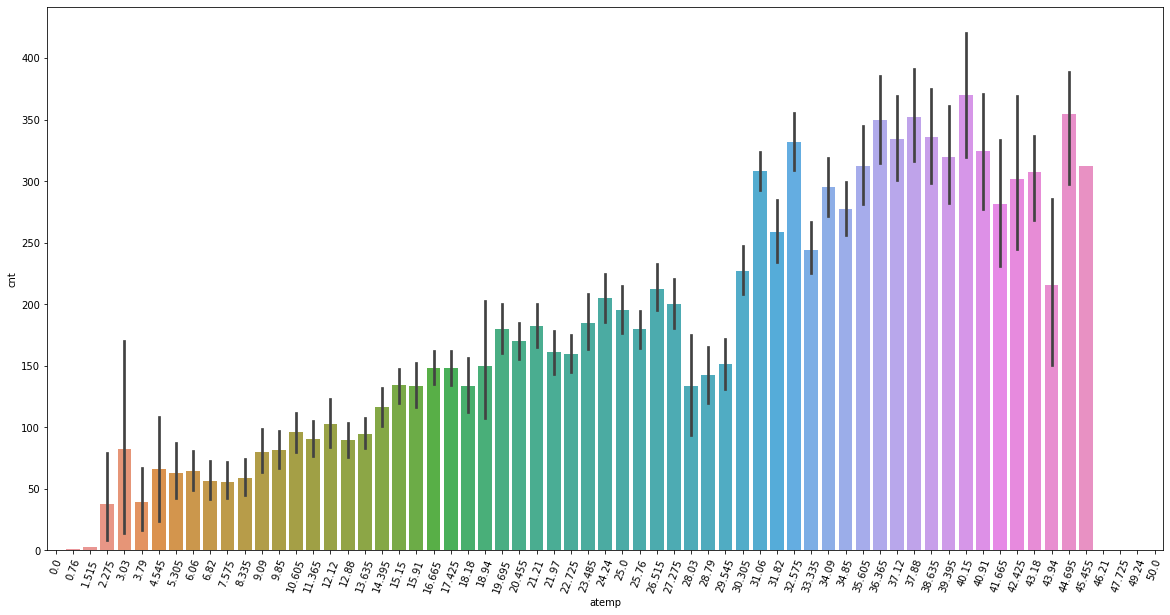

draw col: humidity


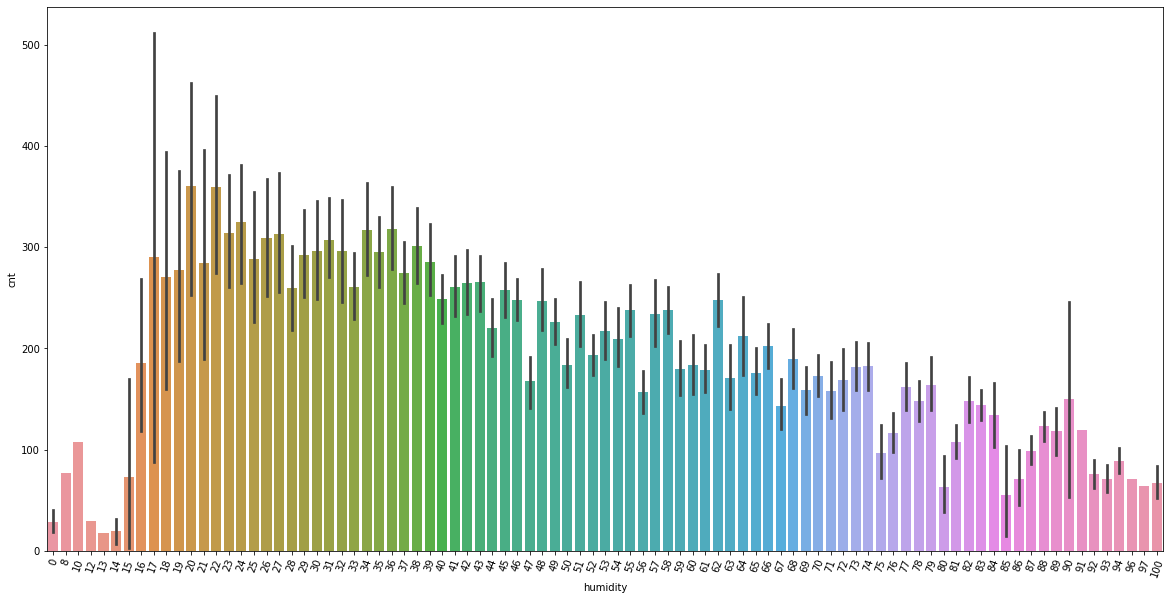

draw col: windspeed


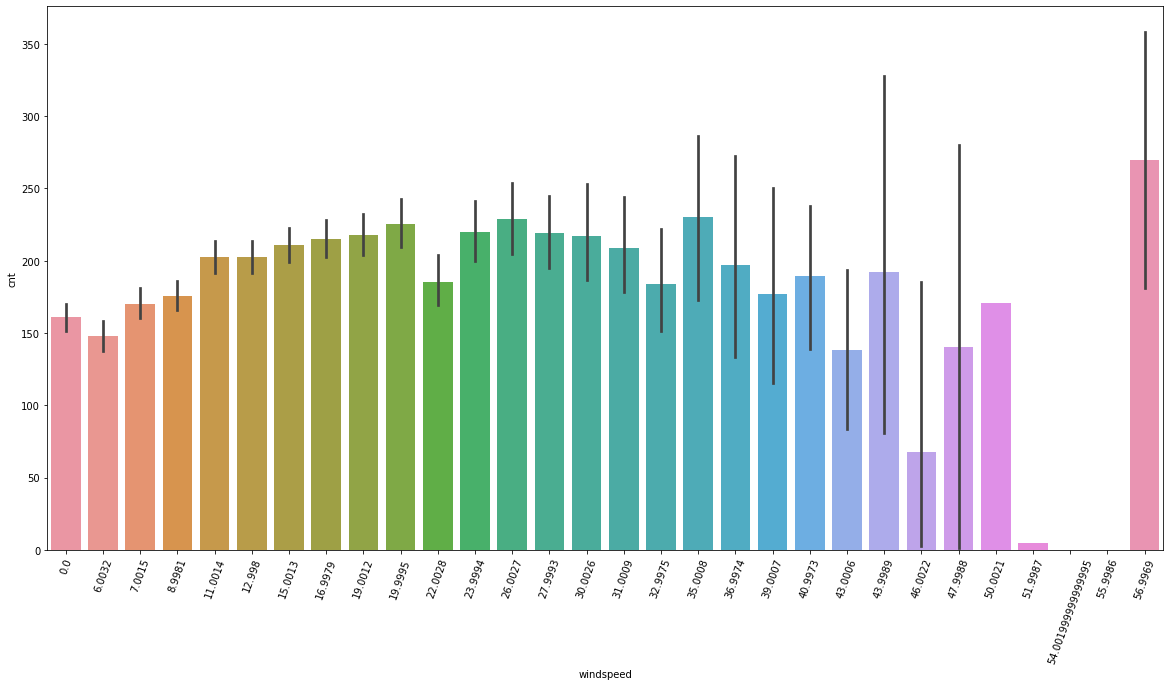

skip col : casual
skip col : registered
skip col : cnt


In [13]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    bar_plot(col,"cnt",all_data)

skip col : datetime
draw col: season


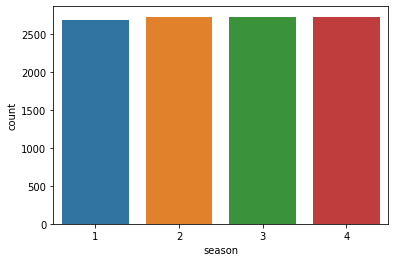

draw col: holiday


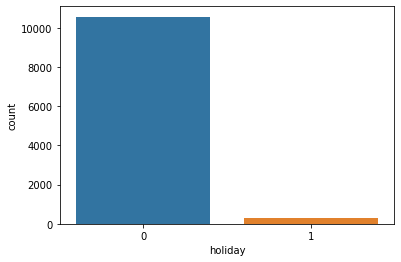

draw col: workingday


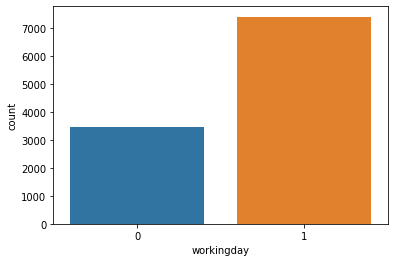

draw col: weather


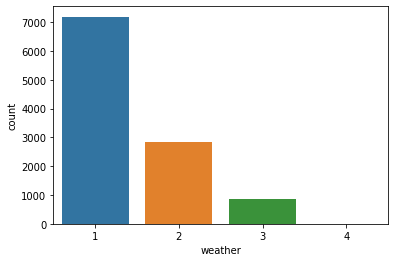

draw col: temp


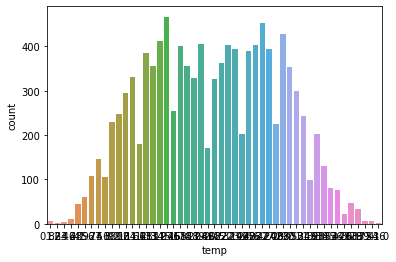

draw col: atemp


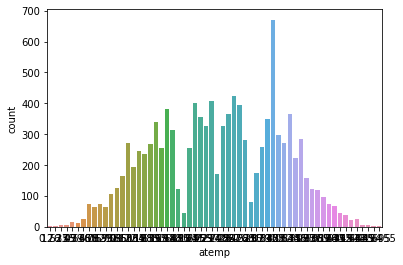

draw col: humidity


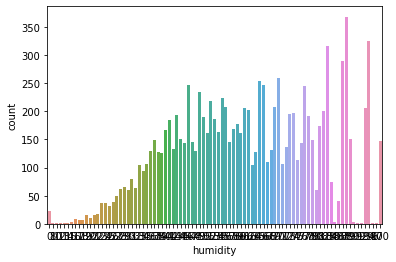

draw col: windspeed


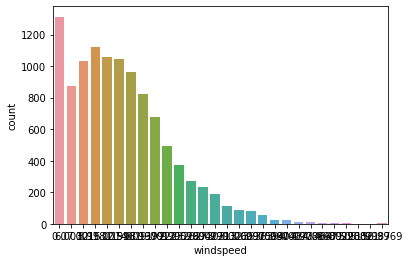

skip col : casual
skip col : registered
skip col : cnt


In [14]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    count_plot(train[col])

skip col : datetime
draw col: season


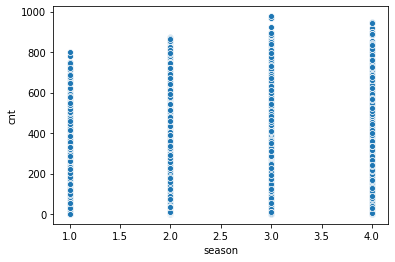

draw col: holiday


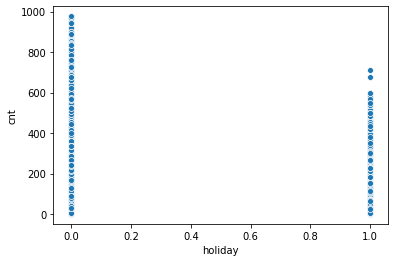

draw col: workingday


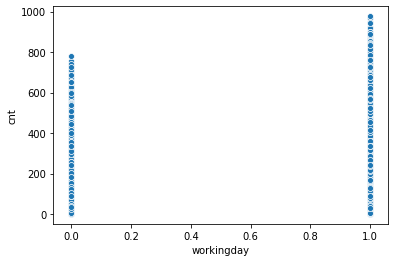

draw col: weather


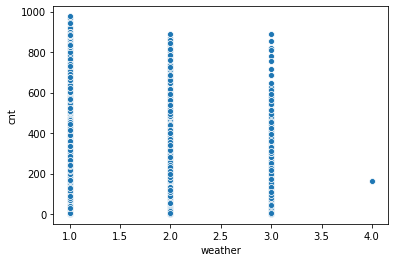

draw col: temp


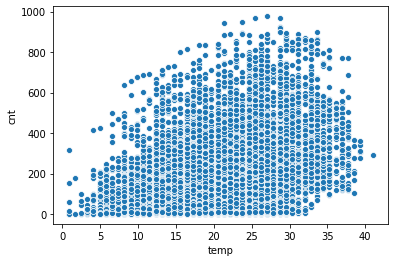

draw col: atemp


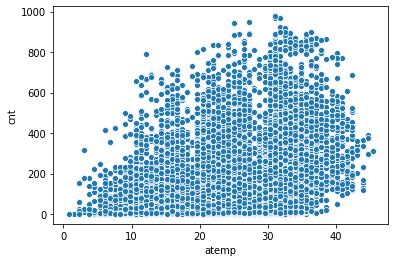

draw col: humidity


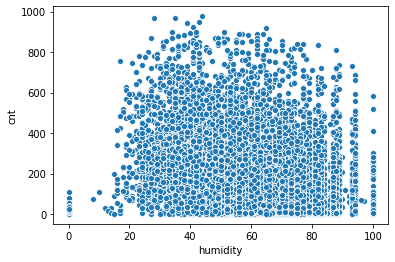

draw col: windspeed


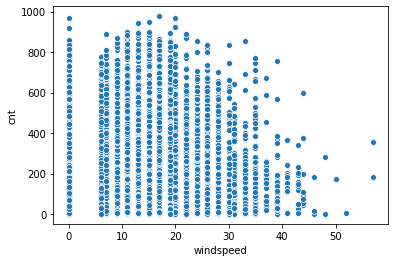

skip col : casual
skip col : registered
skip col : cnt


In [15]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    scatter_plot(train[col],train["cnt"])

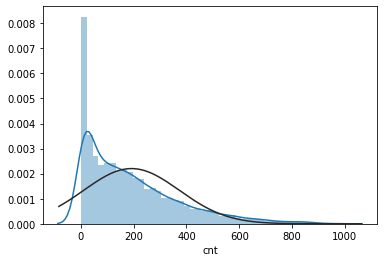

In [16]:
dist_plot(train.cnt)

In [17]:
all_data["is_test"]=all_data["cnt"].isnull()

In [18]:
all_data.is_test.value_counts()

False    10886
True      6493
Name: is_test, dtype: int64

In [19]:
train.shape,test.shape

((10886, 12), (6493, 12))

In [20]:
all_data["year"]=all_data["datetime"].dt.year
all_data["month"]=all_data["datetime"].dt.month
all_data["hour"]=all_data["datetime"].dt.hour


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  cnt         10886 non-null  float64       
 12  is_test     17379 non-null  bool          
 13  year        17379 non-null  int64         
 14  month       17379 non-null  int64         
 15  hour        17379 non-null  int64         
dtypes: bool(1), datetime64[

In [22]:
all_data["year_month"]=all_data["year"].astype("str")+"_"+all_data["month"].astype("str")

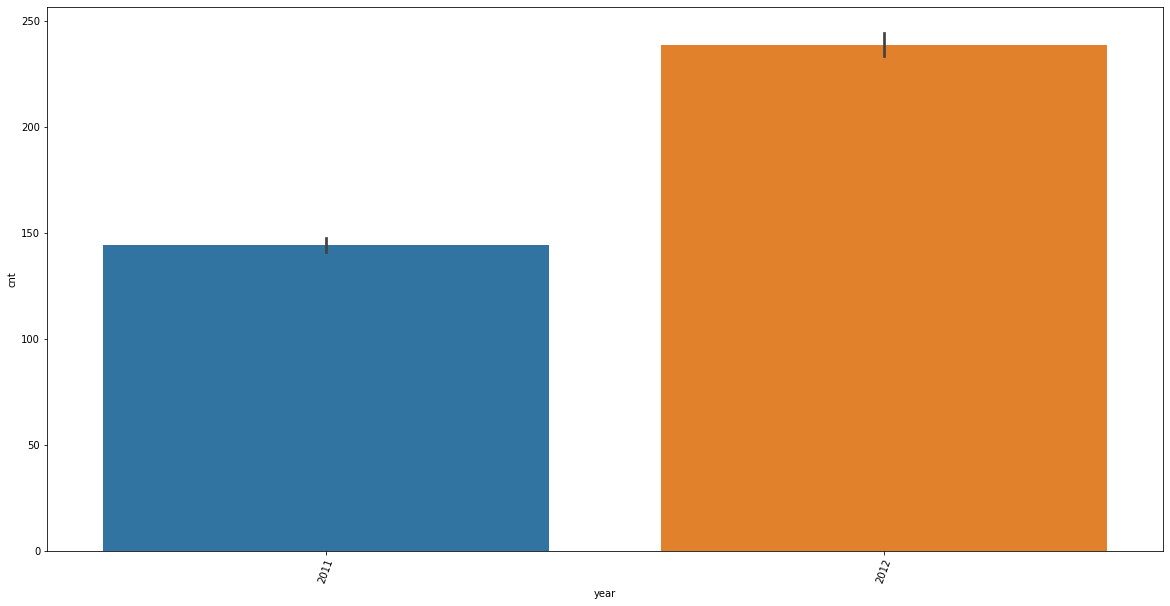

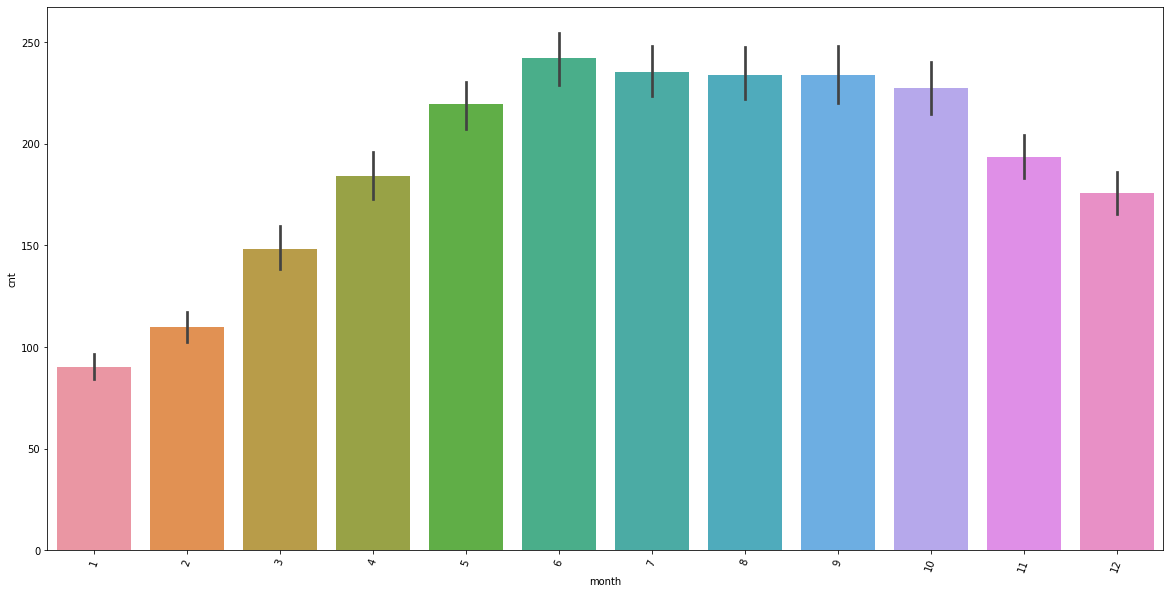

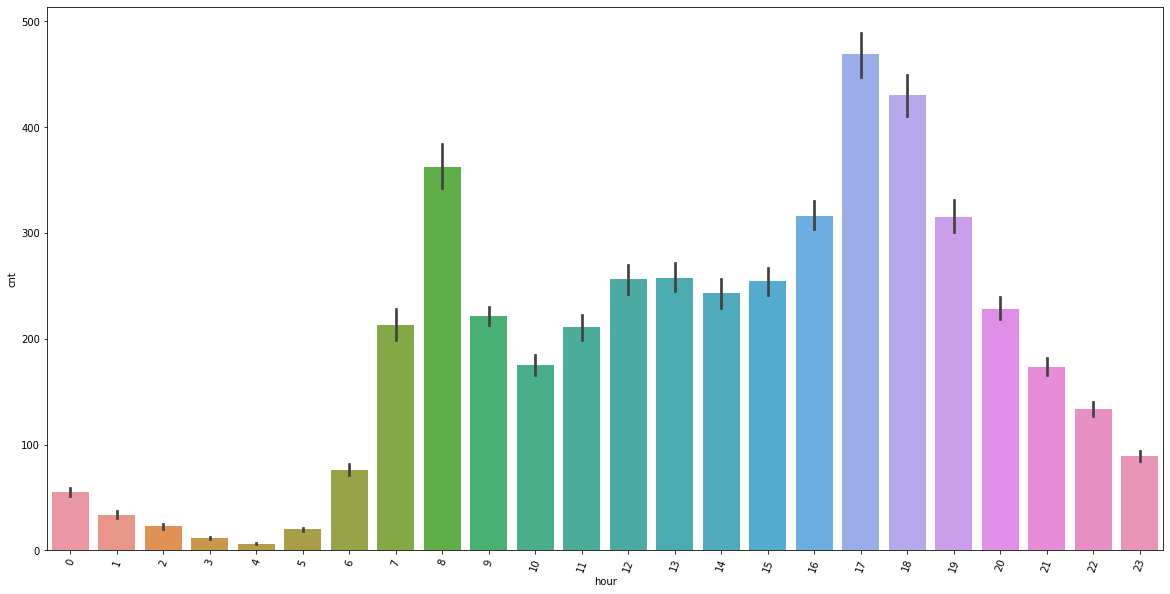

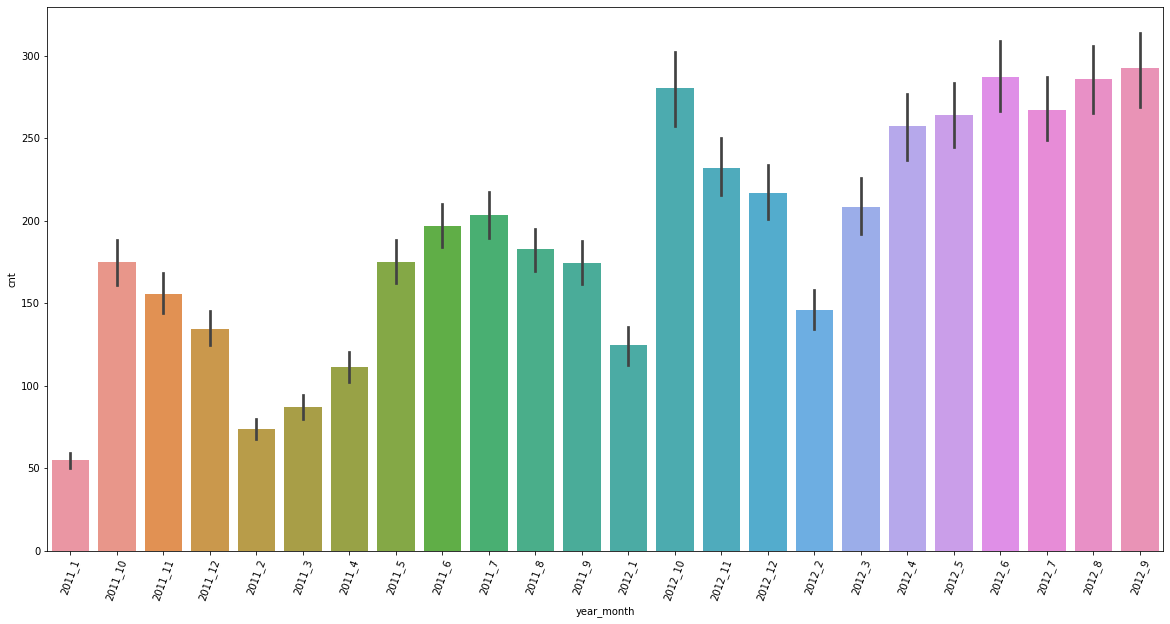

In [23]:
bar_col=["year","month","hour","year_month"]
for col in bar_col:
    bar_plot(col,"cnt",data=all_data.dropna())

## categorical value

In [24]:
cat_col=["season","holiday","workingday","weather","year","month","hour"]
for col in cat_col:
    all_data[col]=all_data[col].astype("str")

## float value

In [25]:
# float_col=["temp","humidity","windspeed"]
# for col in float_col:
#     all_data[col]=pd.qcut(all_data[col],15, duplicates="drop")

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   holiday     17379 non-null  object        
 3   workingday  17379 non-null  object        
 4   weather     17379 non-null  object        
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  cnt         10886 non-null  float64       
 12  is_test     17379 non-null  bool          
 13  year        17379 non-null  object        
 14  month       17379 non-null  object        
 15  hour        17379 non-null  object        
 16  year_month  17379 non-n

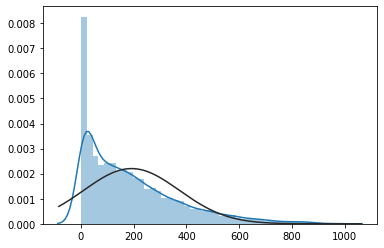

191.57413191254824 181.1361335742659


In [27]:
dist_plot(y_train)
mu,sigma=norm.fit(y_train)
print(mu,sigma)

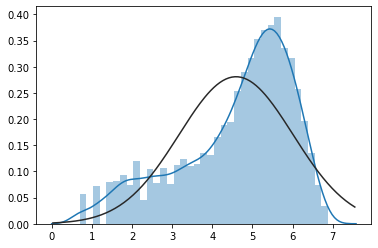

4.591363690454027 1.4193889866524083


In [28]:
y_train=np.log1p(y_train)
dist_plot(y_train)
mu,sigma=norm.fit(y_train)
print(mu,sigma)

In [29]:
all_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt',
       'is_test', 'year', 'month', 'hour', 'year_month'],
      dtype='object')

In [30]:
all_data.drop(["casual","registered","cnt"],axis=1,inplace=True)
all_data.drop(["datetime","is_test"],axis=1,inplace=True)
all_data.drop(["atemp"],axis=1,inplace=True)

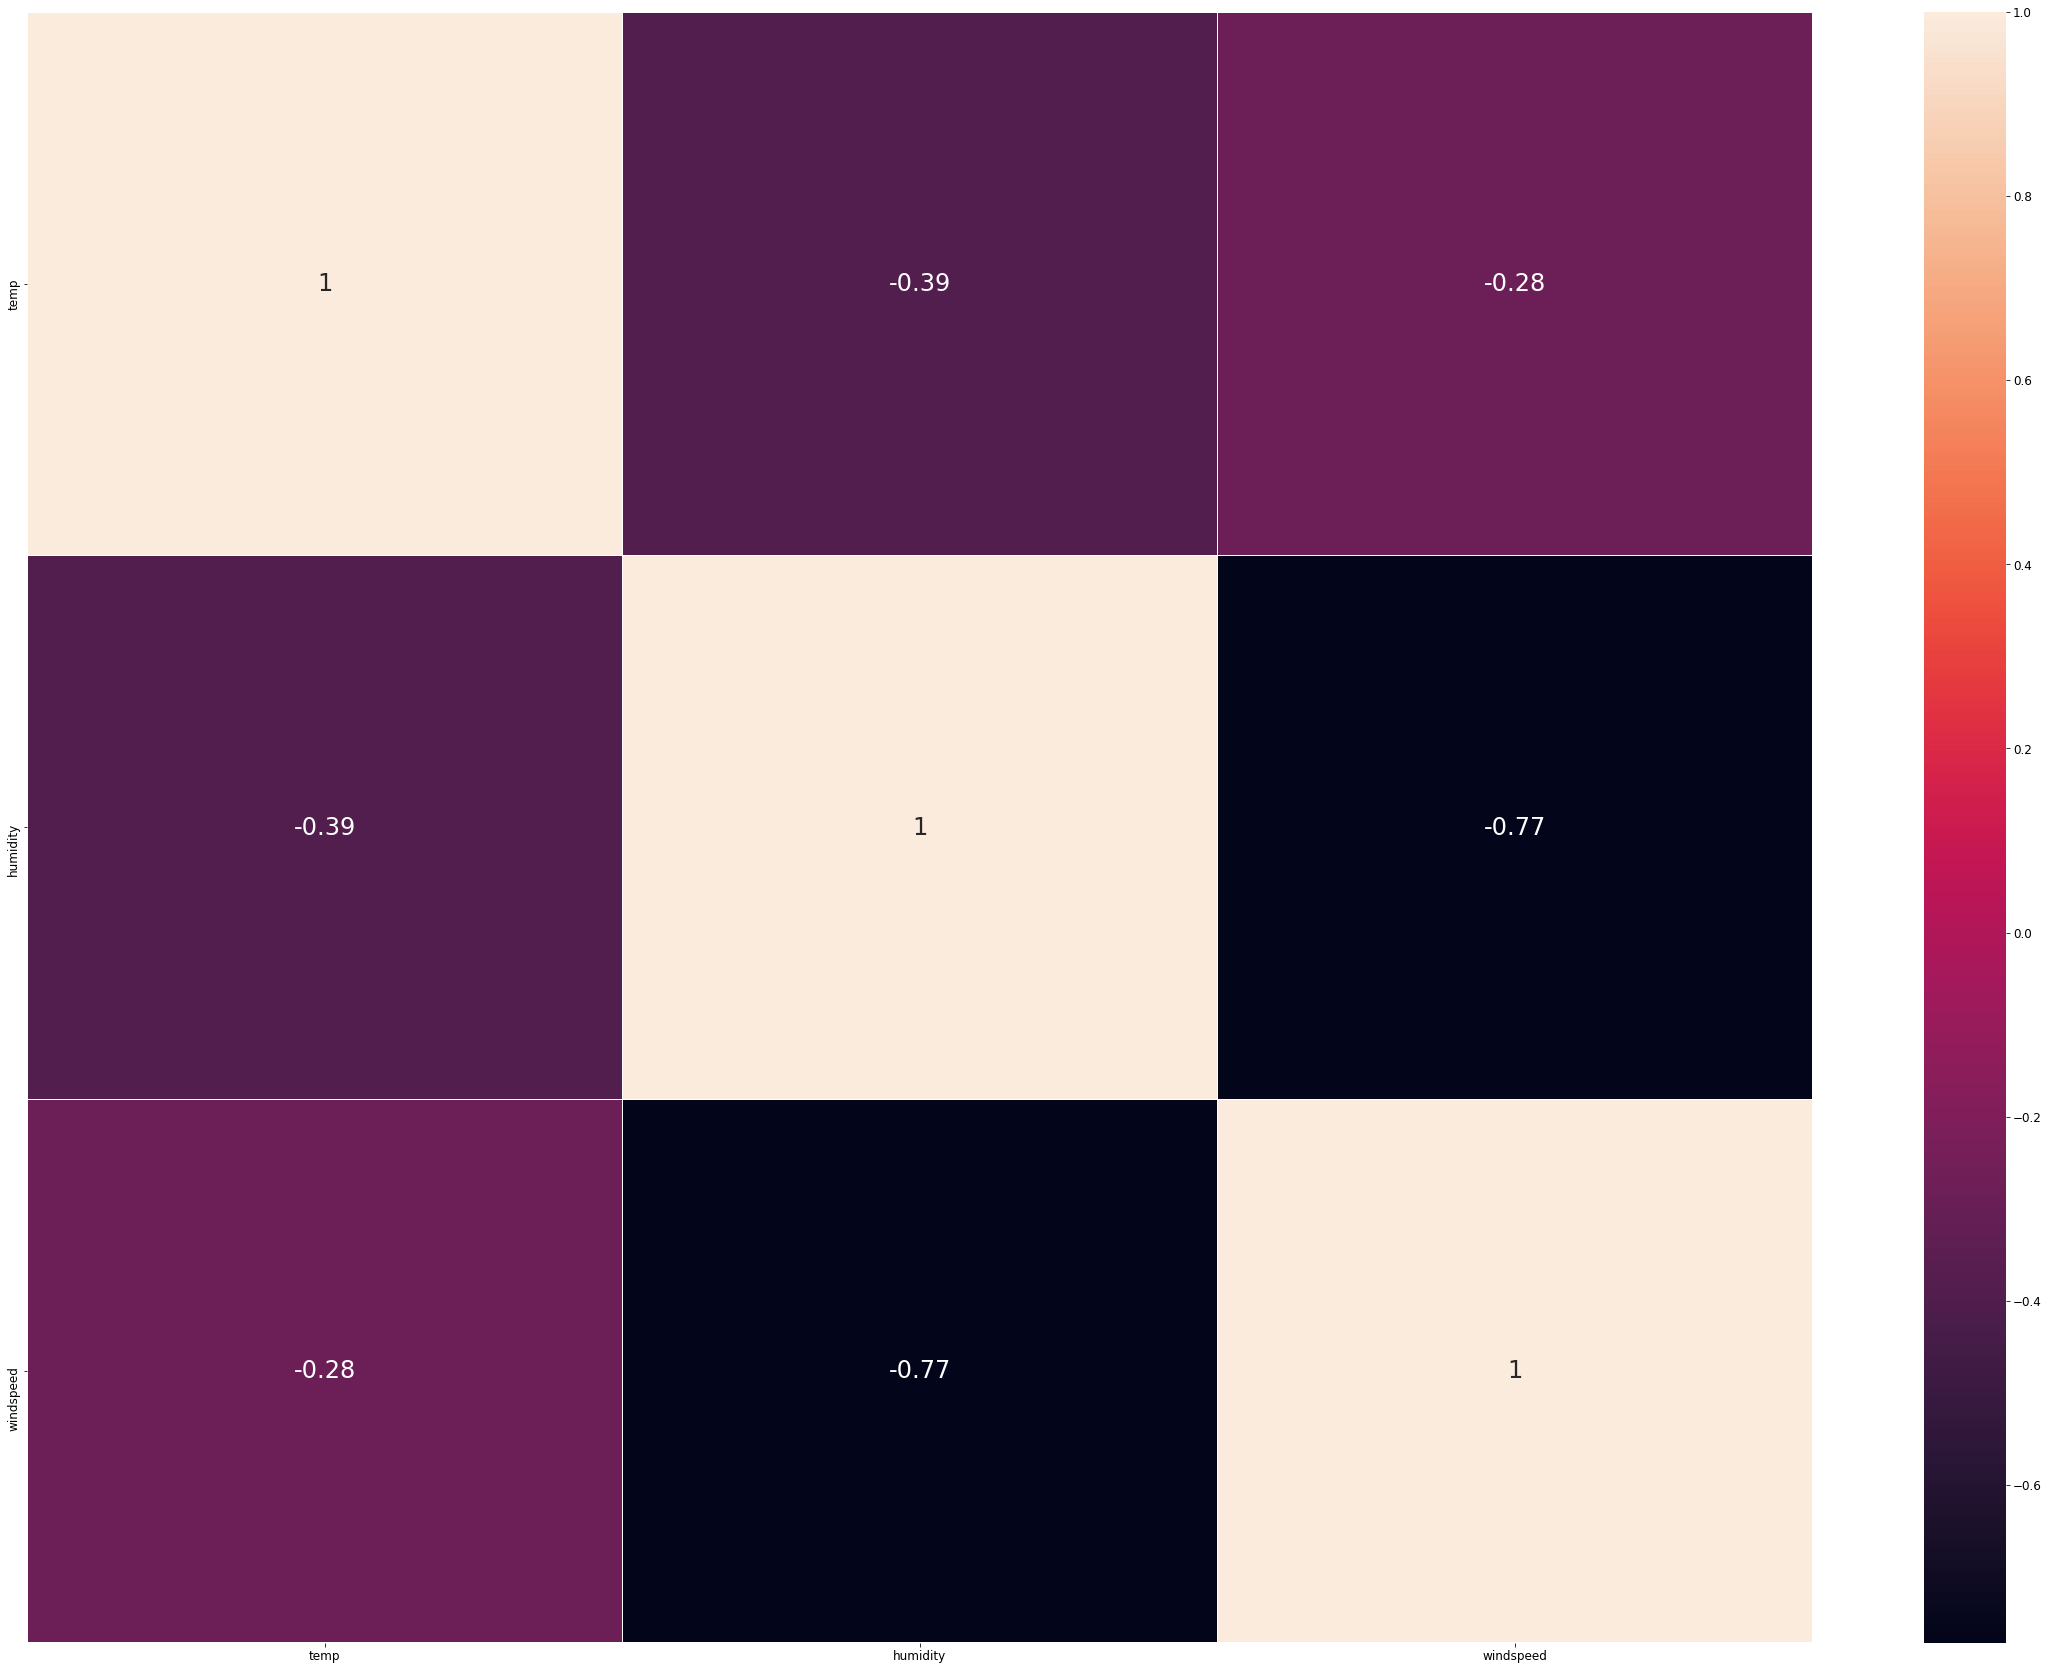

In [31]:
plt.rcParams.update({'font.size': 12})
corr=all_data.corr()
f,ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr.astype(float).corr(),linewidths=0.1,annot=True,annot_kws={'size':24})

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   holiday     17379 non-null  object 
 2   workingday  17379 non-null  object 
 3   weather     17379 non-null  object 
 4   temp        17379 non-null  float64
 5   humidity    17379 non-null  int64  
 6   windspeed   17379 non-null  float64
 7   year        17379 non-null  object 
 8   month       17379 non-null  object 
 9   hour        17379 non-null  object 
 10  year_month  17379 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.2+ MB


In [33]:
all_data.describe()

,temp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000
mean,20.376474,62.722884,12.736540
std,7.894801,19.292983,8.196795
min,0.820000,0.000000,0.000000
25%,13.940000,48.000000,7.001500
50%,20.500000,63.000000,12.998000
75%,27.060000,78.000000,16.997900
max,41.000000,100.000000,56.996900


In [34]:
# columns=["season","holiday","workingday","weather","workingday","hour"]
# for col in columns:
#     all_data[col]=all_data[col].astype(str)

In [35]:
all_data.shape

(17379, 11)

In [36]:
all_data=pd.get_dummies(all_data)

In [37]:
train=all_data[:n_train]
test=all_data[n_train:]

## Model

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [39]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    print(kf)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [40]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [41]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [42]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [43]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [44]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,
                             tree_method="gpu_hist")

In [45]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [46]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5

Lasso score: 0.6076 (0.0468)



In [47]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5
ElasticNet score: 0.6077 (0.0486)



In [48]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5
Kernel Ridge score: 0.5902 (0.0700)



In [49]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5
Gradient Boosting score: 0.3932 (0.1229)



In [50]:
start=time.time()
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(time.time()-start)

5
Xgboost score: 0.3833 (0.1053)

104.02574348449707


In [51]:
start=time.time()
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(time.time()-start)

5
Xgboost score: 0.3833 (0.1053)

105.6573748588562


In [49]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

5
LGBM score: 0.4641 (0.0998)



In [50]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [51]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5
 Averaged base models score: 0.5123 (0.0674)



In [52]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [53]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

5


KeyboardInterrupt: 

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.square(np.log(y + 1) - np.log(y_pred + 1))))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(RMLSE(y_train, stacked_train_pred))

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.6 +
               xgb_train_pred*0.4))# + lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.5 + xgb_pred*0.5 # + lgb_pred*0.1

In [ ]:
sub = pd.DataFrame()
sub['datetime'] = test_id
sub['count'] = ensemble

from datetime import datetime
now=datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_ensemble_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [ ]:
test.info()

In [65]:
for col in all_data.columns:
    if "month" in col:
        print(col)

month_1
month_10
month_11
month_12
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
year_month_2011_1
year_month_2011_10
year_month_2011_11
year_month_2011_12
year_month_2011_2
year_month_2011_3
year_month_2011_4
year_month_2011_5
year_month_2011_6
year_month_2011_7
year_month_2011_8
year_month_2011_9
year_month_2012_1
year_month_2012_10
year_month_2012_11
year_month_2012_12
year_month_2012_2
year_month_2012_3
year_month_2012_4
year_month_2012_5
year_month_2012_6
year_month_2012_7
year_month_2012_8
year_month_2012_9
